Created by Kerim Birtem

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas.api.types import CategoricalDtype
import matplotlib.image as image
import re
from PIL import Image

In [ ]:
sns.set(rc={'figure.figsize':(9,6)})

Data Upload Method 1

In [ ]:
from google.colab import files

uploaded = files.upload()


Saving AB_NYC_2019.csv to AB_NYC_2019.csv


In [ ]:
import io

csv_filename = next(iter(uploaded))
data = pd.read_csv(io.StringIO(uploaded[csv_filename].decode('utf-8')))
import os
print(os.listdir())

Data Upload Method 2

Drag and drop the CSV file manually to the 'Files' tab on the left-hand side menu.

In [2]:
data =pd.read_csv('AB_NYC_2019.csv')
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [3]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [4]:
data.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [5]:
data.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [6]:
data.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In the dataset, NaN values in the 'name' and 'host_name' columns were defined as 'Unknown,' and NaN values in the 'last_review' and 'reviews_per_month' columns were defined as '0'.

In [7]:
data[['name','host_name']] = data[['name','host_name']].fillna('Unknown')
data[['last_review','reviews_per_month']] = data[['last_review','reviews_per_month']].fillna('0')

In [8]:
data.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [ ]:
data['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [ ]:
data['neighbourhood_group'].value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

In [ ]:
data['neighbourhood'].unique()

array(['Kensington', 'Midtown', 'Harlem', 'Clinton Hill', 'East Harlem',
       'Murray Hill', 'Bedford-Stuyvesant', "Hell's Kitchen",
       'Upper West Side', 'Chinatown', 'South Slope', 'West Village',
       'Williamsburg', 'Fort Greene', 'Chelsea', 'Crown Heights',
       'Park Slope', 'Windsor Terrace', 'Inwood', 'East Village',
       'Greenpoint', 'Bushwick', 'Flatbush', 'Lower East Side',
       'Prospect-Lefferts Gardens', 'Long Island City', 'Kips Bay',
       'SoHo', 'Upper East Side', 'Prospect Heights',
       'Washington Heights', 'Woodside', 'Brooklyn Heights',
       'Carroll Gardens', 'Gowanus', 'Flatlands', 'Cobble Hill',
       'Flushing', 'Boerum Hill', 'Sunnyside', 'DUMBO', 'St. George',
       'Highbridge', 'Financial District', 'Ridgewood',
       'Morningside Heights', 'Jamaica', 'Middle Village', 'NoHo',
       'Ditmars Steinway', 'Flatiron District', 'Roosevelt Island',
       'Greenwich Village', 'Little Italy', 'East Flatbush',
       'Tompkinsville', 'Asto

In [ ]:
data['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [ ]:
data['room_type'].value_counts()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

In [12]:
data['price'].value_counts()

100    2051
150    2047
50     1534
60     1458
200    1401
       ... 
780       1
386       1
888       1
483       1
338       1
Name: price, Length: 674, dtype: int64

In [13]:
(data['price'] == 0).sum()

11

<ipython-input-14-d22ea59fc861>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True);


Text(0.5, 1.0, 'Correlation Matrix')

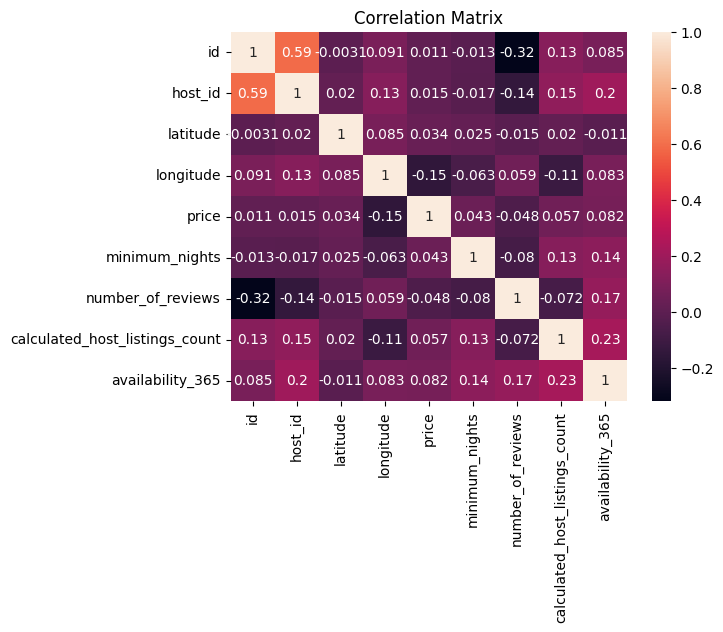

In [14]:
sns.heatmap(data.corr(), annot=True);
plt.title("Correlation Matrix")

The missing values in the 'price' column were filled by taking the average of the values from the same 'neighbourhood' and 'room_type'.

In [19]:
data['price'].replace(0, float('nan'), inplace=True)
data.isnull().sum()

id                                 0
name                               0
host_id                            0
host_name                          0
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                             11
minimum_nights                     0
number_of_reviews                  0
last_review                        0
reviews_per_month                  0
calculated_host_listings_count     0
availability_365                   0
dtype: int64

In [21]:
data['price'] = data.groupby(['neighbourhood', 'room_type'])['price'].transform(lambda x: x.fillna(x.mean()))
data.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

What are the most frequently used words in the listing titles?

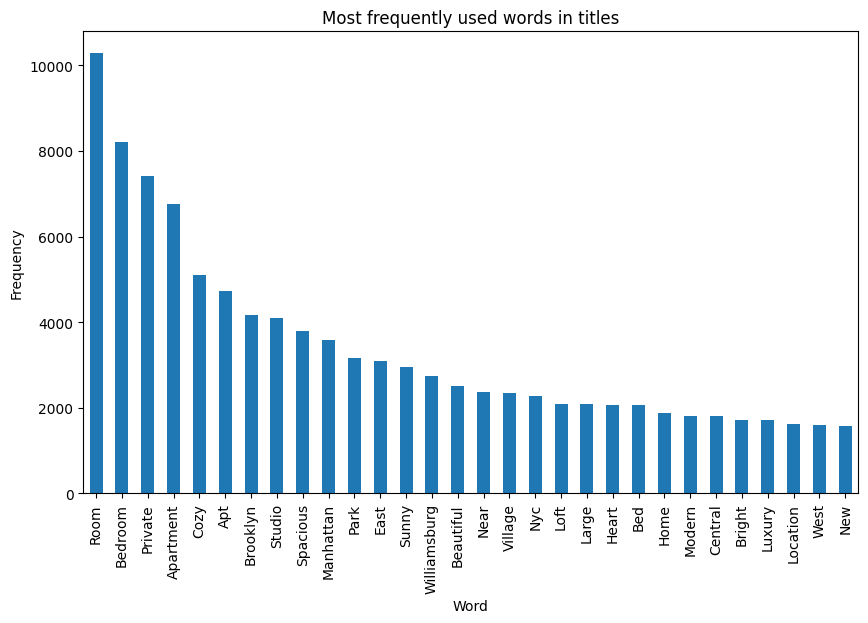

In [25]:
name_list = data['name']
names_used = []
pattern = r'\W+'
excluded_words = set(['on', 'in', 'at', 'and', 'the', 'to', 'w', 'of', 'a', 'an', 'for', 'with','from'])

for i in name_list:
    x = re.split(pattern, i)
    for adj in x:
        if len(adj) > 0 and not adj.isnumeric() and adj.lower() not in excluded_words:
            names_used.append(adj.lower())

word_counts_30 = pd.Series(names_used).str.capitalize().value_counts().nlargest(30)

plt.figure(figsize=(10, 6))
word_counts_30.plot(kind='bar')
plt.title('Most frequently used words in titles')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.show()

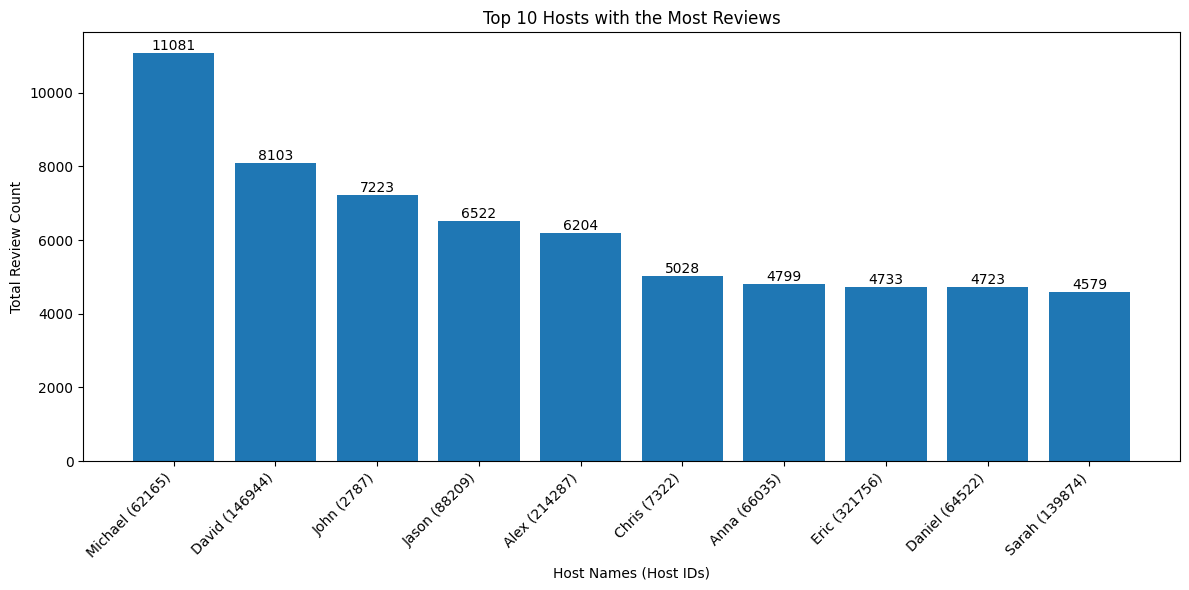

In [83]:
host_reviews_count = data.groupby('host_name')['number_of_reviews'].sum().reset_index()
host_reviews_count = host_reviews_count.sort_values(by='number_of_reviews', ascending=False)

plt.figure(figsize=(12, 6))
bars = plt.bar(host_reviews_count['host_name'][:10], host_reviews_count['number_of_reviews'][:10])
plt.xlabel('Host Names (Host IDs)')
plt.ylabel('Total Review Count')
plt.title('Top 10 Hosts with the Most Reviews')
plt.xticks(rotation=45, ha='right')

x_labels = [f"{name} ({data[data['host_name'] == name]['host_id'].values[0]})" for name in host_reviews_count['host_name'][:10]]
plt.xticks(range(len(x_labels)), x_labels)  # Set the custom x-axis labels

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), ha='center', va='bottom')

plt.tight_layout()
plt.show()

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Bronx'),
  Text(1, 0, 'Brooklyn'),
  Text(2, 0, 'Manhattan'),
  Text(3, 0, 'Queens'),
  Text(4, 0, 'Staten Island')])

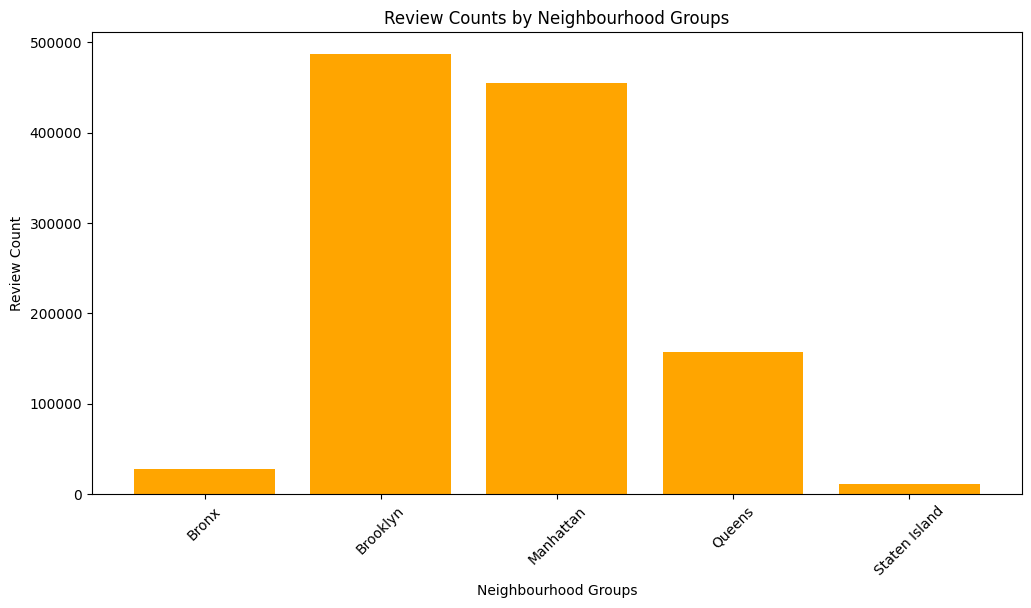

In [86]:
grouped_data = data.groupby('neighbourhood_group')['number_of_reviews'].sum()

plt.figure(figsize=(12, 6))
plt.bar(grouped_data.index, grouped_data.values,color="orange")
plt.xlabel('Neighbourhood Groups')
plt.ylabel('Review Count')
plt.title('Review Counts by Neighbourhood Groups')
plt.xticks(rotation=45)

Text(0.5, 1.0, 'Availability Days by Neighbourhood Group')

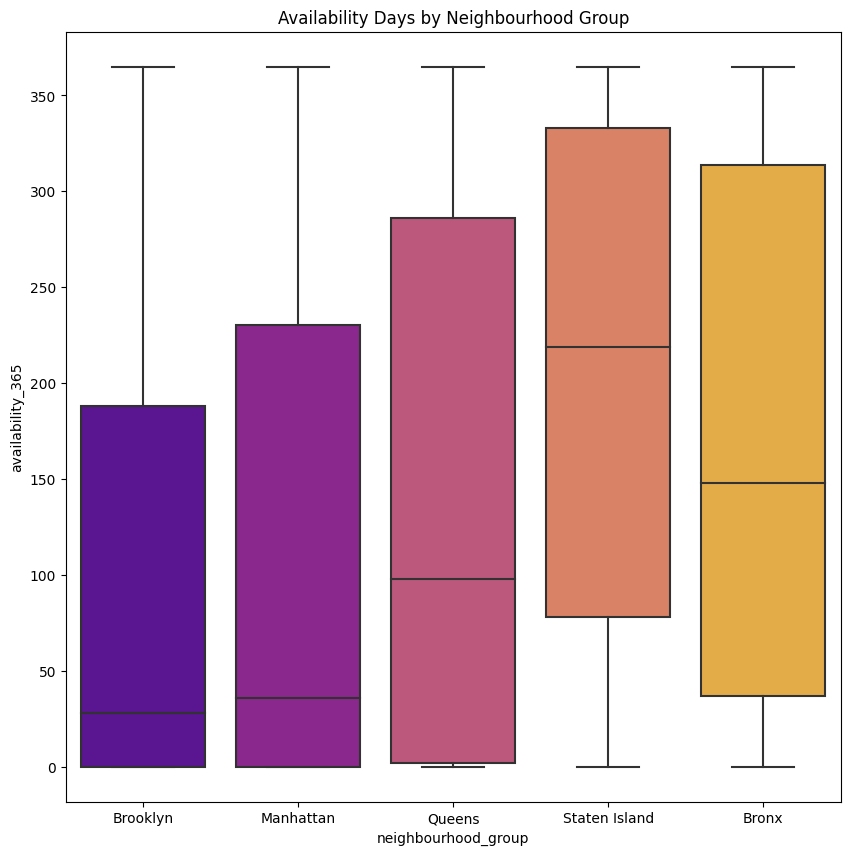

In [89]:
plt.figure(figsize=(10, 10))
sns.boxplot(data=data, x='neighbourhood_group', y='availability_365', palette='plasma')
plt.title('Availability Days by Neighbourhood Group')

The distribution of 'neighbourhood group' and 'room_type' in the dataset:

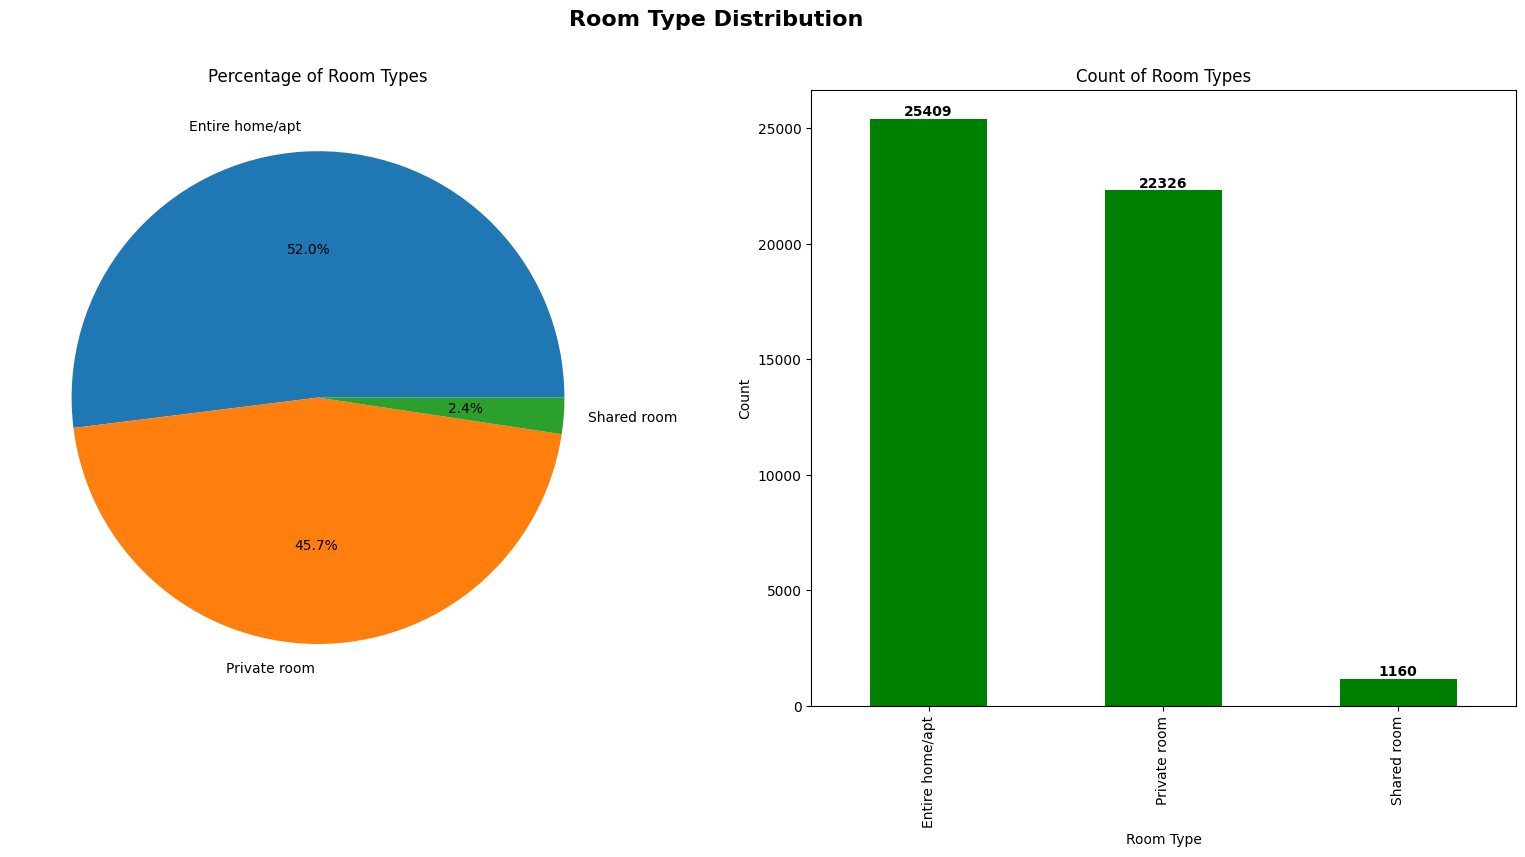

In [34]:
room_type_counts = data['room_type'].value_counts()
total_count = room_type_counts.sum()

fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Pie chart on the left side
axes[0].pie(room_type_counts, labels=room_type_counts.index, autopct='%1.1f%%')
axes[0].set_title('Percentage of Room Types')

# Bar chart on the right side
room_type_counts.plot(kind='bar',color='green', ax=axes[1])
axes[1].set_title('Count of Room Types')
axes[1].set_xlabel('Room Type')
axes[1].set_ylabel('Count')

for i, count in enumerate(room_type_counts):
        axes[1].text(
            x=i,
            y=count,
            s=str(count),
            ha='center',
            va='bottom',
            fontsize=10,
            fontweight='bold'
        )
plt.suptitle('Room Type Distribution', fontsize=16, fontweight='bold')
plt.show()

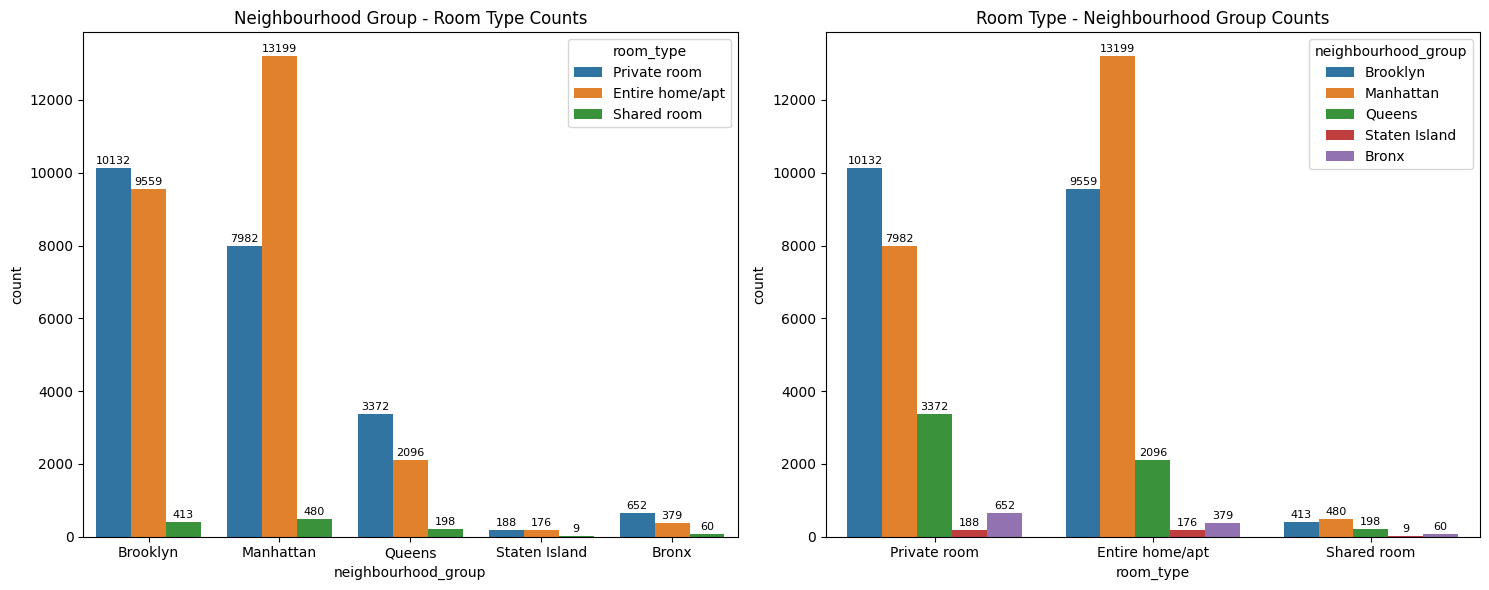

In [43]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

sns_plot1 = sns.countplot(x="neighbourhood_group", hue="room_type", data=data, ax=axes[0])
for p in sns_plot1.patches:
    sns_plot1.annotate(format(p.get_height(), '.0f'),
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center',
                       xytext=(0, 5),
                       textcoords='offset points',
                       fontsize=8
                       )
axes[0].set_title("Neighbourhood Group - Room Type Counts")


sns_plot2 = sns.countplot(x="room_type", hue="neighbourhood_group", data=data, ax=axes[1])
for p in sns_plot2.patches:
    sns_plot2.annotate(format(p.get_height(), '.0f'),
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center',
                       xytext=(0, 5),
                       textcoords='offset points',
                       fontsize=8
                       )
axes[1].set_title("Room Type - Neighbourhood Group Counts")

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Neighbourhood Group - Room Type Price')

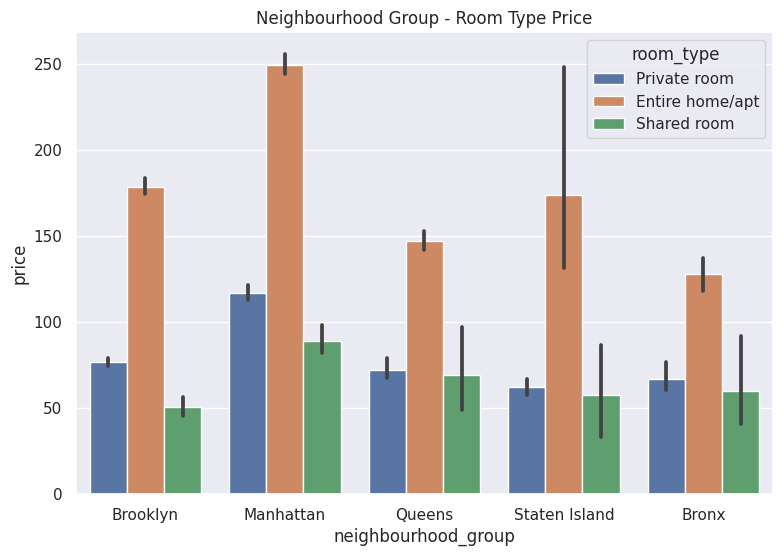

In [ ]:
sns.barplot(x="neighbourhood_group", y="price", hue="room_type", data=data)
plt.title("Neighbourhood Group - Room Type Price")

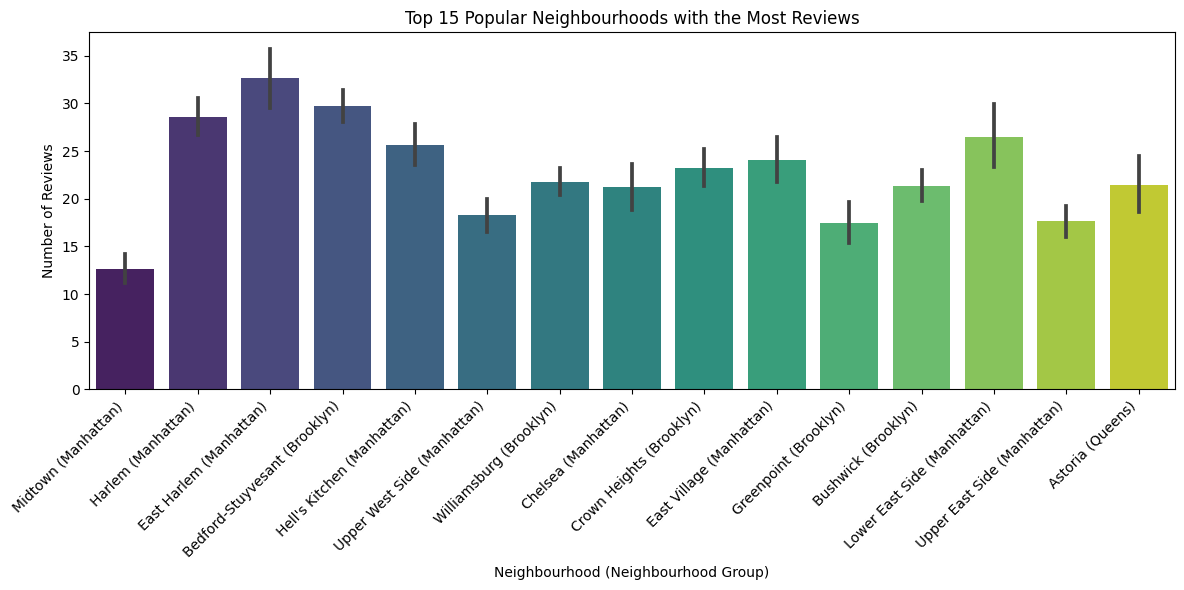

In [97]:
popular_neighbourhoods = data['neighbourhood'].value_counts().nlargest(15).index

filtered_data = data[data['neighbourhood'].isin(popular_neighbourhoods)]
x_labels = [f"{neighbourhood} ({group})" for neighbourhood, group in zip(filtered_data['neighbourhood'], filtered_data['neighbourhood_group'])]

plt.figure(figsize=(12, 6))
sns.barplot(x=x_labels, y=filtered_data['number_of_reviews'], palette='viridis')
plt.xlabel('Neighbourhood (Neighbourhood Group)')
plt.ylabel('Number of Reviews')
plt.title('Top 15 Popular Neighbourhoods with the Most Reviews')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


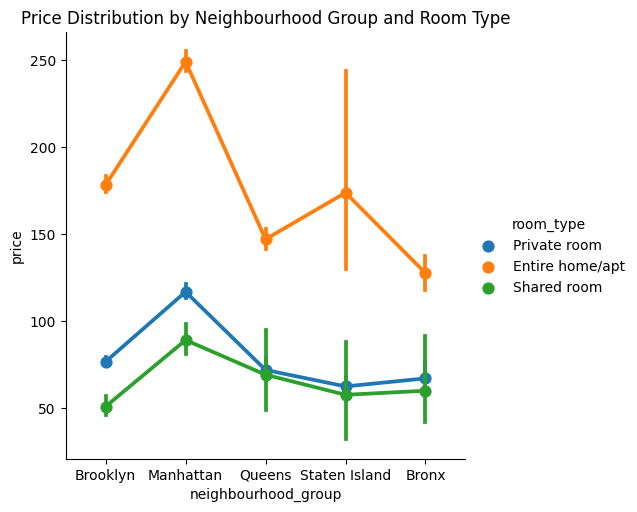

In [98]:
sns.catplot(x="neighbourhood_group", y="price", hue="room_type", kind="point", data=data)
plt.title("Price Distribution by Neighbourhood Group and Room Type")
plt.show()


<Axes: xlabel='availability_365', ylabel='Count'>

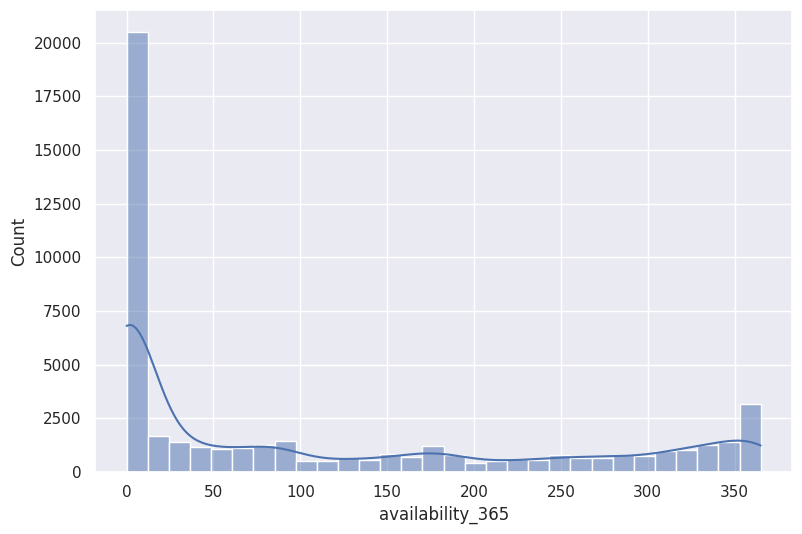

In [ ]:
sns.histplot(data["availability_365"], kde=True) # bins= auto

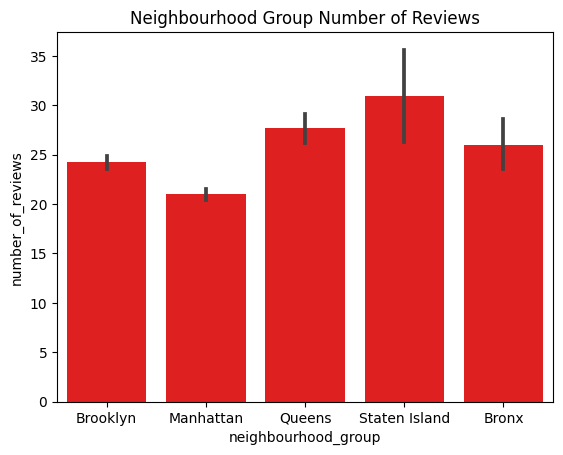

In [44]:
sns_plot = sns.barplot(x="neighbourhood_group", y="number_of_reviews", data=data, color="red").set_title("Neighbourhood Group Number of Reviews")


<Figure size 1000x500 with 0 Axes>

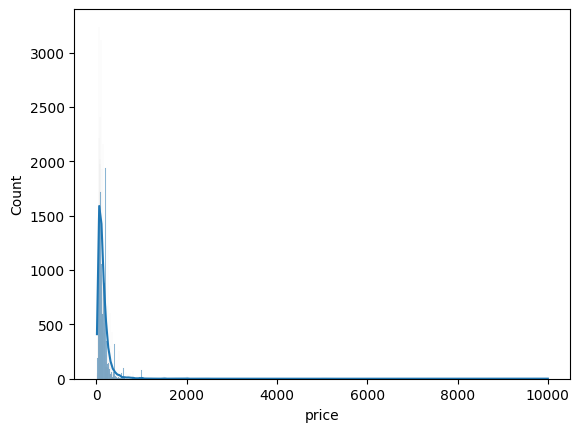

<Figure size 1000x500 with 0 Axes>

In [45]:
sns.histplot(data["price"], kde=True) # bins= auto
plt.figure(figsize=(10,5))

Text(0.5, 1.0, '0-1000 arası Price Dağılımlar')

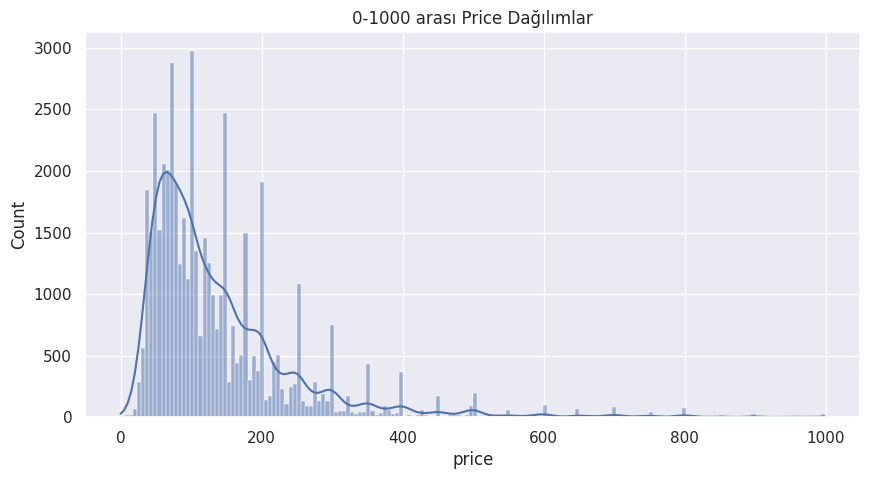

In [ ]:
filtered_data0to1000 = data[data["price"] < 1000]
plt.figure(figsize=(10,5))
sns.histplot(filtered_data0to1000["price"], kde=True) # bins= auto
plt.title("0-1000 arası Price Dağılımlar")

Text(0.5, 1.0, '1000-10000 arası Price Dağılımlar')

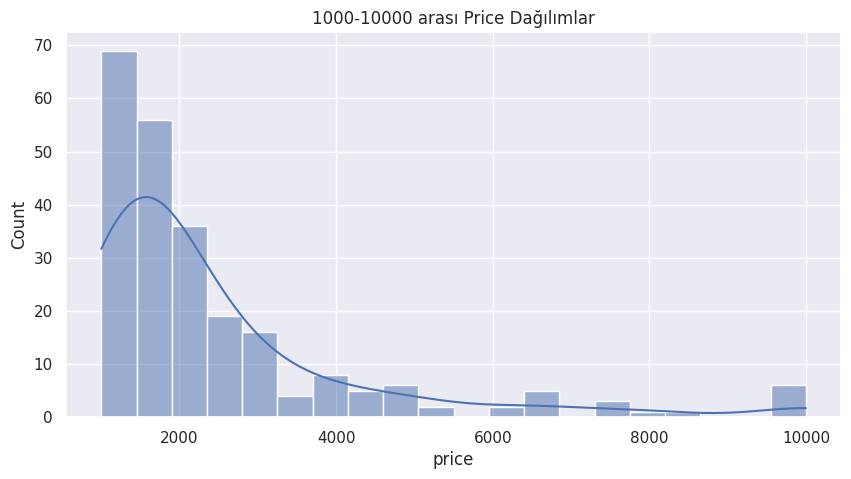

In [ ]:
filtered_data1000to10000 = data[data["price"] > 1000]
plt.figure(figsize=(10,5))
sns.histplot(filtered_data1000to10000["price"], kde=True) # bins= auto
plt.title("1000-10000 arası Price Dağılımlar")

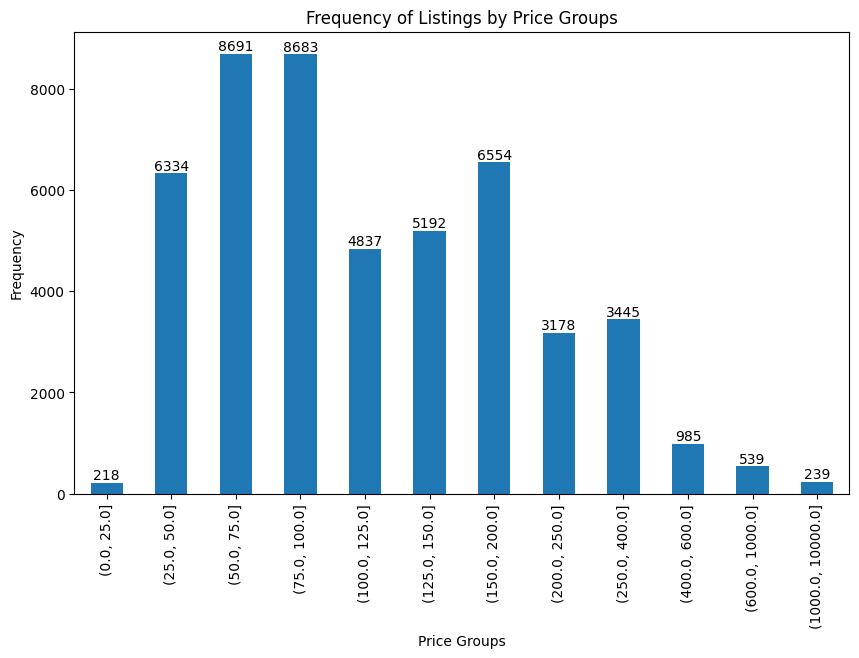

In [99]:
price_bins = [0, 25, 50, 75, 100, 125, 150, 200, 250, 400, 600, 1000, data['price'].max()]
data['price_group'] = pd.cut(data['price'], bins=price_bins)

prices= data['price_group'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
prices.plot(kind='bar')
plt.title('Frequency of Listings by Price Groups')
plt.xlabel('Price Groups')
plt.ylabel('Frequency')
for index, value in enumerate(prices):
    plt.text(index, value, str(value), ha='center', va='bottom')
plt.show()

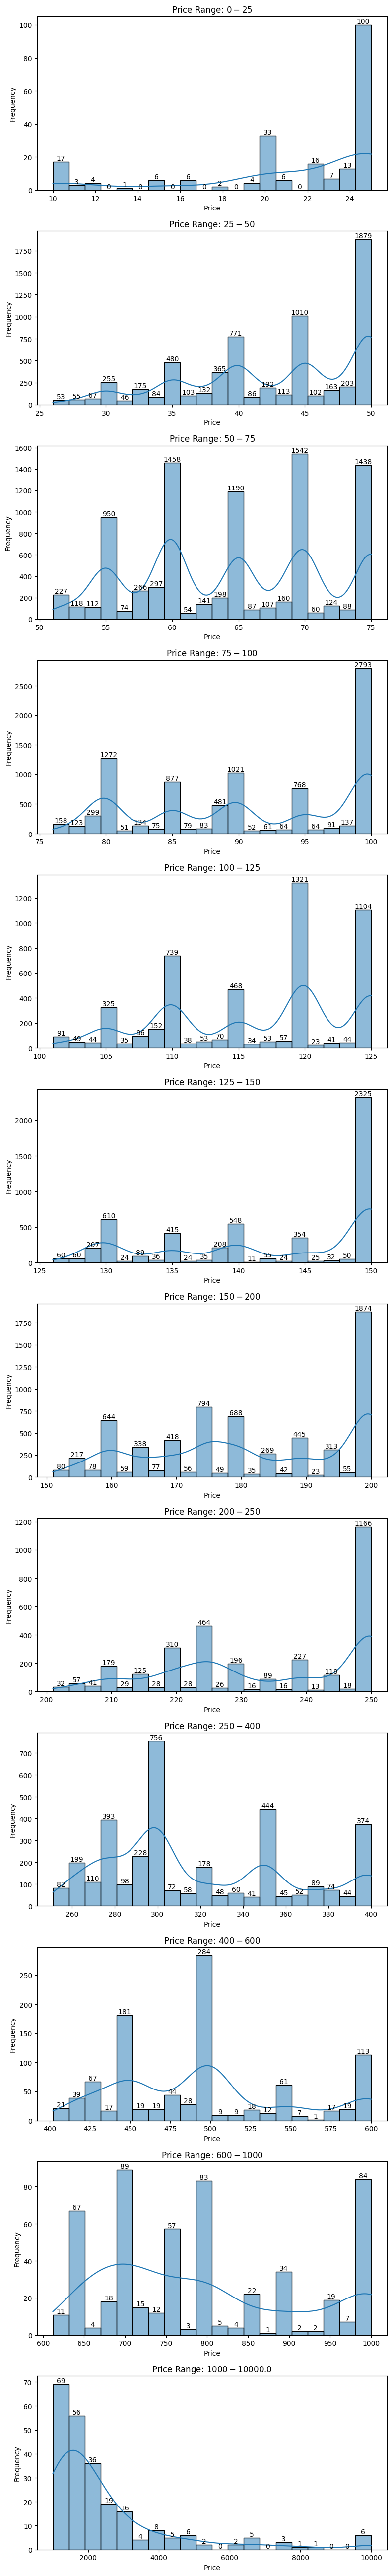

In [102]:
fig, axes = plt.subplots(len(price_bins)-1, 1, figsize=(8, 4 * len(price_bins)), sharex=False)

for i, price_group in enumerate(data['price_group'].cat.categories):
    sns.histplot(data=data[data['price_group'] == price_group], x='price', kde=True, ax=axes[i], bins=20)
    axes[i].set_title(f"Price Range: ${price_bins[i]} - ${price_bins[i+1]}")
    axes[i].set_xlabel('Price')
    axes[i].set_ylabel('Frequency')

    # Barların üzerine değerleri yazdırmak için for döngüsü
    for p in axes[i].patches:
        height = p.get_height()
        axes[i].text(p.get_x() + p.get_width() / 2, height, str(int(height)), ha='center', va='bottom')

plt.tight_layout()
plt.show()

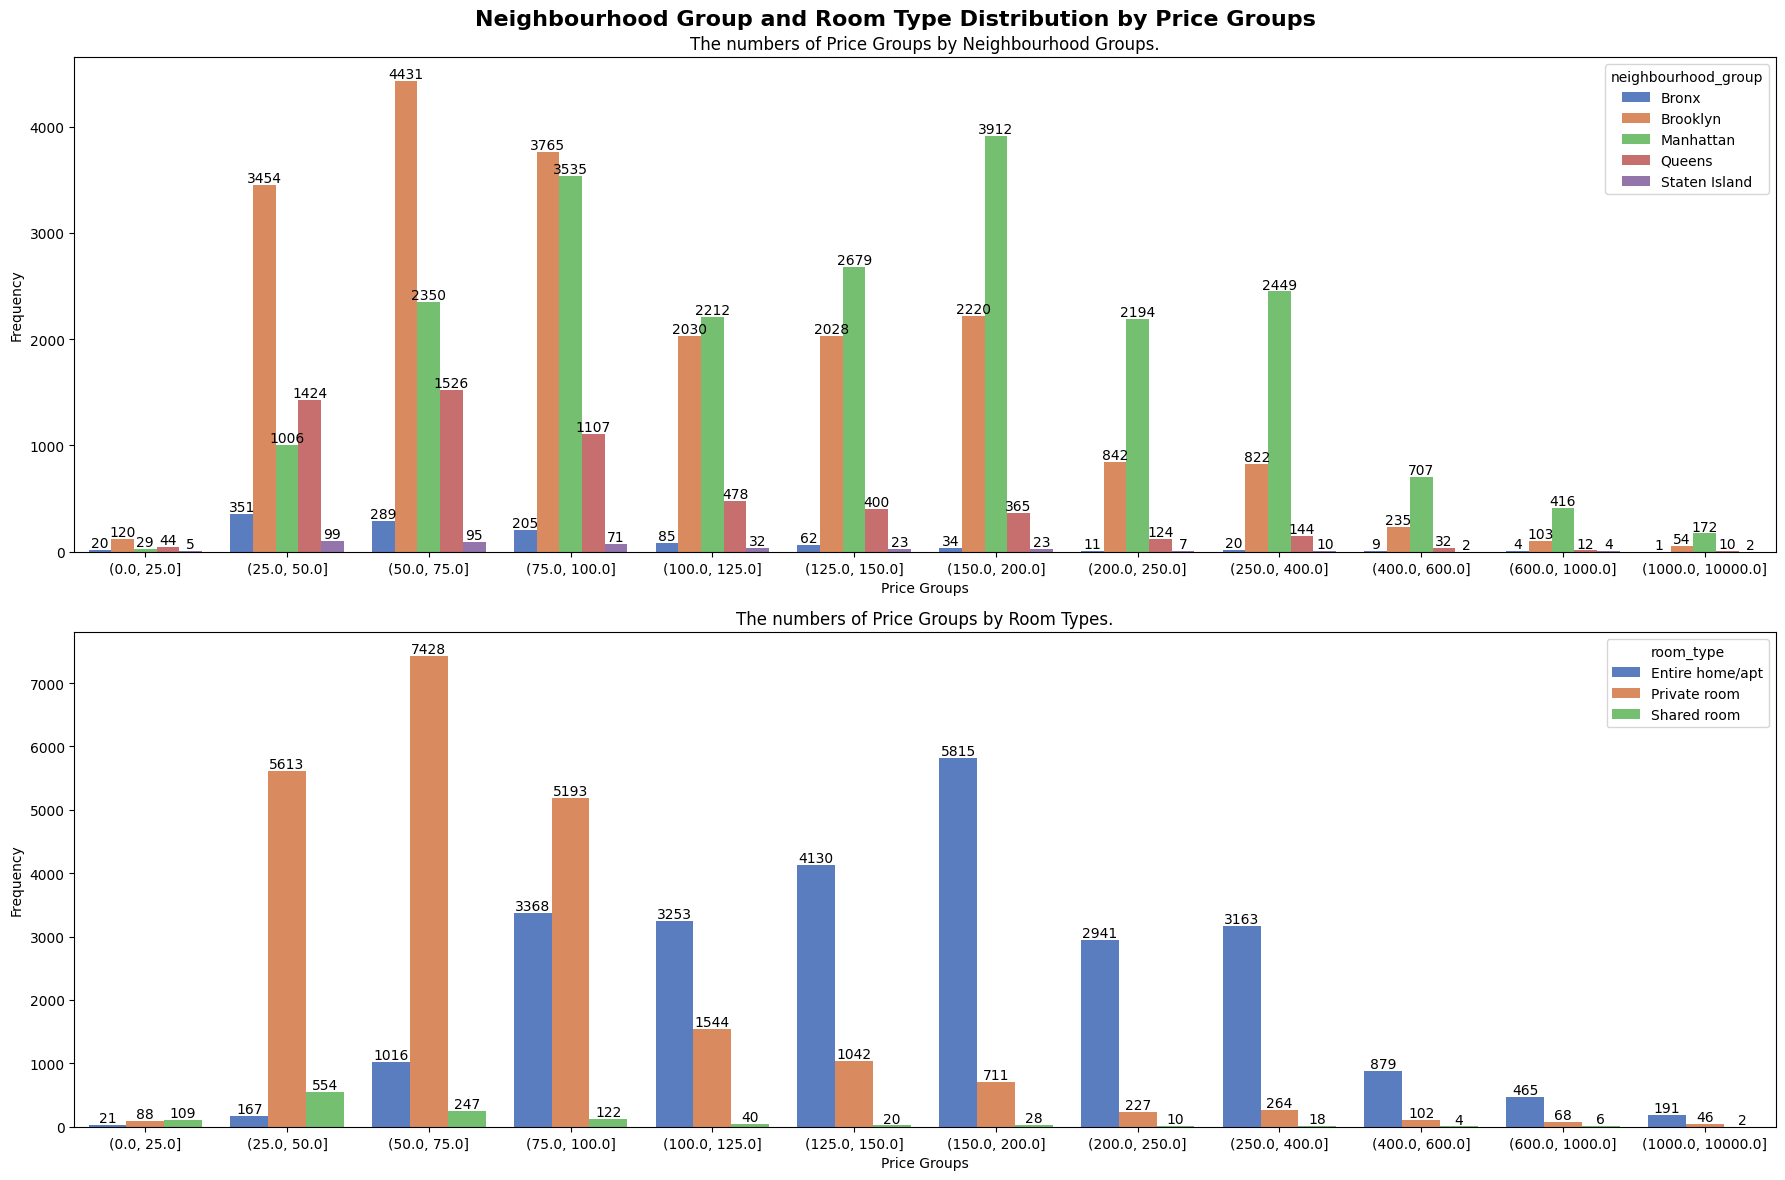

In [68]:
# Data has been grouped by price group and neighbourhood groups.
df_grouped_neighbourhood = data.groupby(['price_group', 'neighbourhood_group']).size().reset_index(name='counts')
# Data has been grouped by price group and room types.
df_grouped_room_type = data.groupby(['price_group', 'room_type']).size().reset_index(name='counts')

fig, axes = plt.subplots(2, 1, figsize=(18, 12))


# (Price group by Neighbourhood Group)
sns.barplot(x='price_group', y='counts', hue='neighbourhood_group', data=df_grouped_neighbourhood, palette='muted', ax=axes[0])
axes[0].set_title('The numbers of Price Groups by Neighbourhood Groups.')
axes[0].set_xlabel('Price Groups')
axes[0].set_ylabel('Frequency')

for p in axes[0].patches:
    axes[0].annotate(format(p.get_height(), '.0f'),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center',
                     xytext=(0, 5),
                     textcoords='offset points',
                     fontsize=10,
                     )

# (Price group by Room Types)
sns.barplot(x='price_group', y='counts', hue='room_type', data=df_grouped_room_type, palette='muted', ax=axes[1])
axes[1].set_title('The numbers of Price Groups by Room Types.')
axes[1].set_xlabel('Price Groups')
axes[1].set_ylabel('Frequency')

for p in axes[1].patches:
    axes[1].annotate(format(p.get_height(), '.0f'),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center',
                     xytext=(0, 5),
                     textcoords='offset points',
                     fontsize=10,
                     )

plt.suptitle('Neighbourhood Group and Room Type Distribution by Price Groups', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()


Loading the map of New York City.

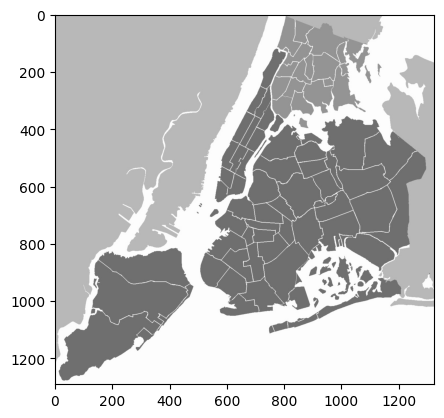

In [73]:
with Image.open("New_York_City_.png") as bg:
    plt.imshow(bg)

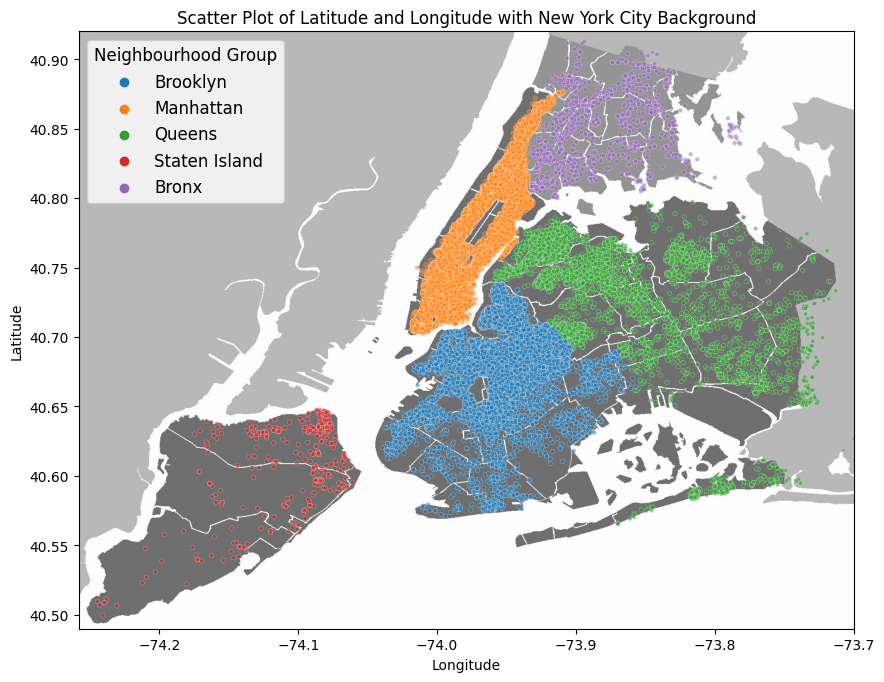

In [74]:
plt.figure(figsize=(10, 8))

plt.imshow(bg,zorder=0,extent=[-74.258, -73.7, 40.49,40.92])

sns.scatterplot(x='longitude', y='latitude', hue='neighbourhood_group', data=data, s=10, alpha=0.5)

plt.title('Scatter Plot of Latitude and Longitude with New York City Background')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Neighbourhood Group', title_fontsize='large', fontsize='large')
plt.show()

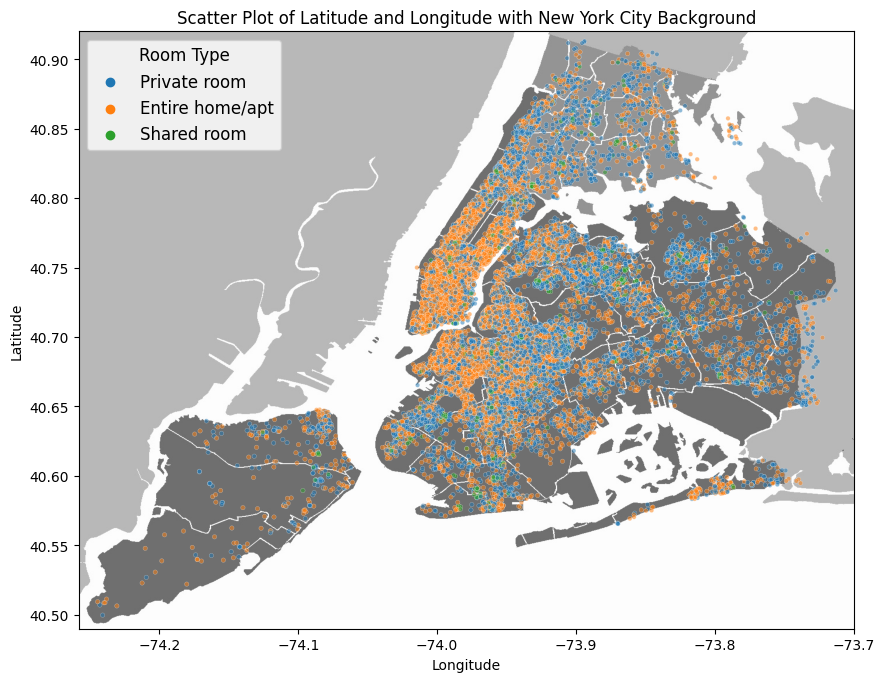

In [75]:
plt.figure(figsize=(10, 8))

plt.imshow(bg,zorder=0,extent=[-74.258, -73.7, 40.49,40.92])

sns.scatterplot(x='longitude', y='latitude', hue='room_type', data=data, s=10, alpha=0.5)

plt.title('Scatter Plot of Latitude and Longitude with New York City Background')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Room Type', title_fontsize='large', fontsize='large')
plt.show()

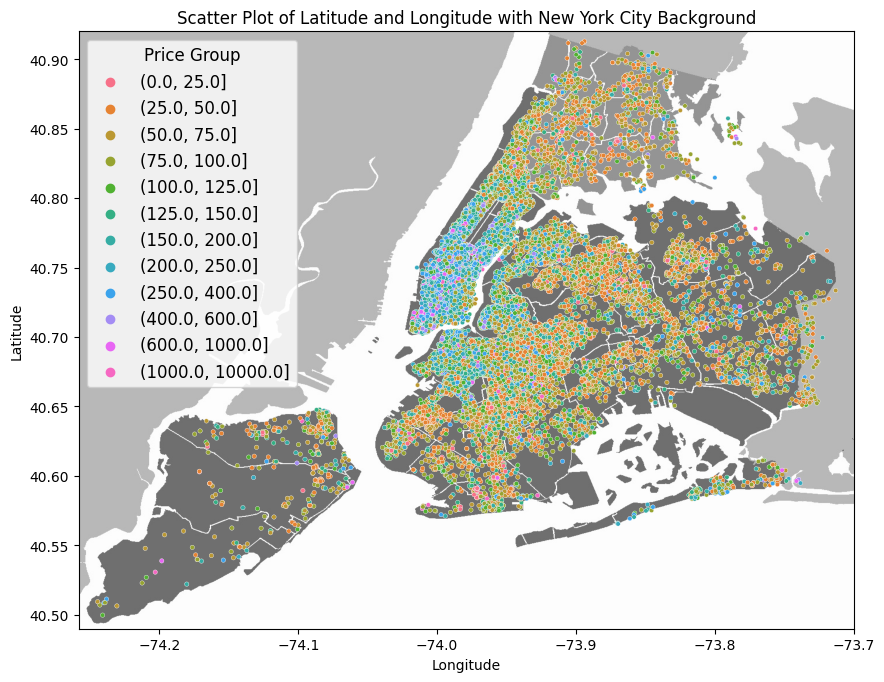

In [76]:
plt.figure(figsize=(10, 8))
plt.imshow(bg,zorder=0,extent=[-74.258, -73.7, 40.49,40.92])

sns.scatterplot(x='longitude', y='latitude', hue='price_group', data=data, s=10)
plt.title('Scatter Plot of Latitude and Longitude with New York City Background')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Price Group', title_fontsize='large', fontsize='large')
plt.show()

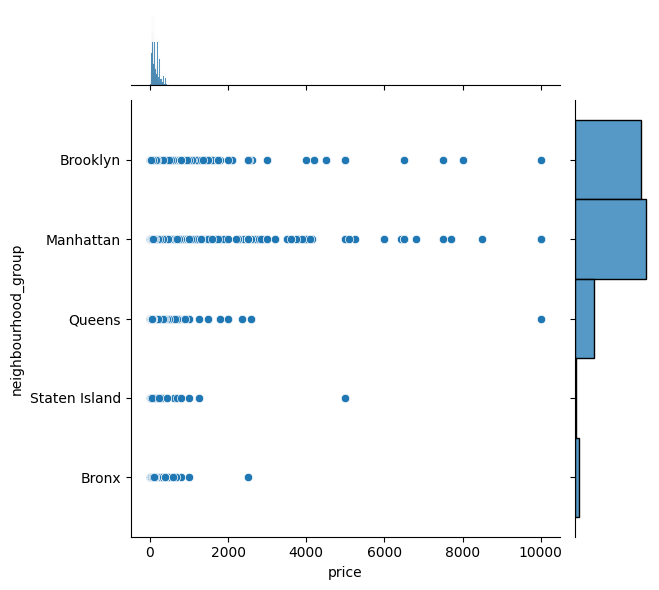

In [80]:
sns.jointplot(x="price", y=data["neighbourhood_group"], data=data)

Text(0.5, 1.0, 'Number of Reviews - Minimum Nights')

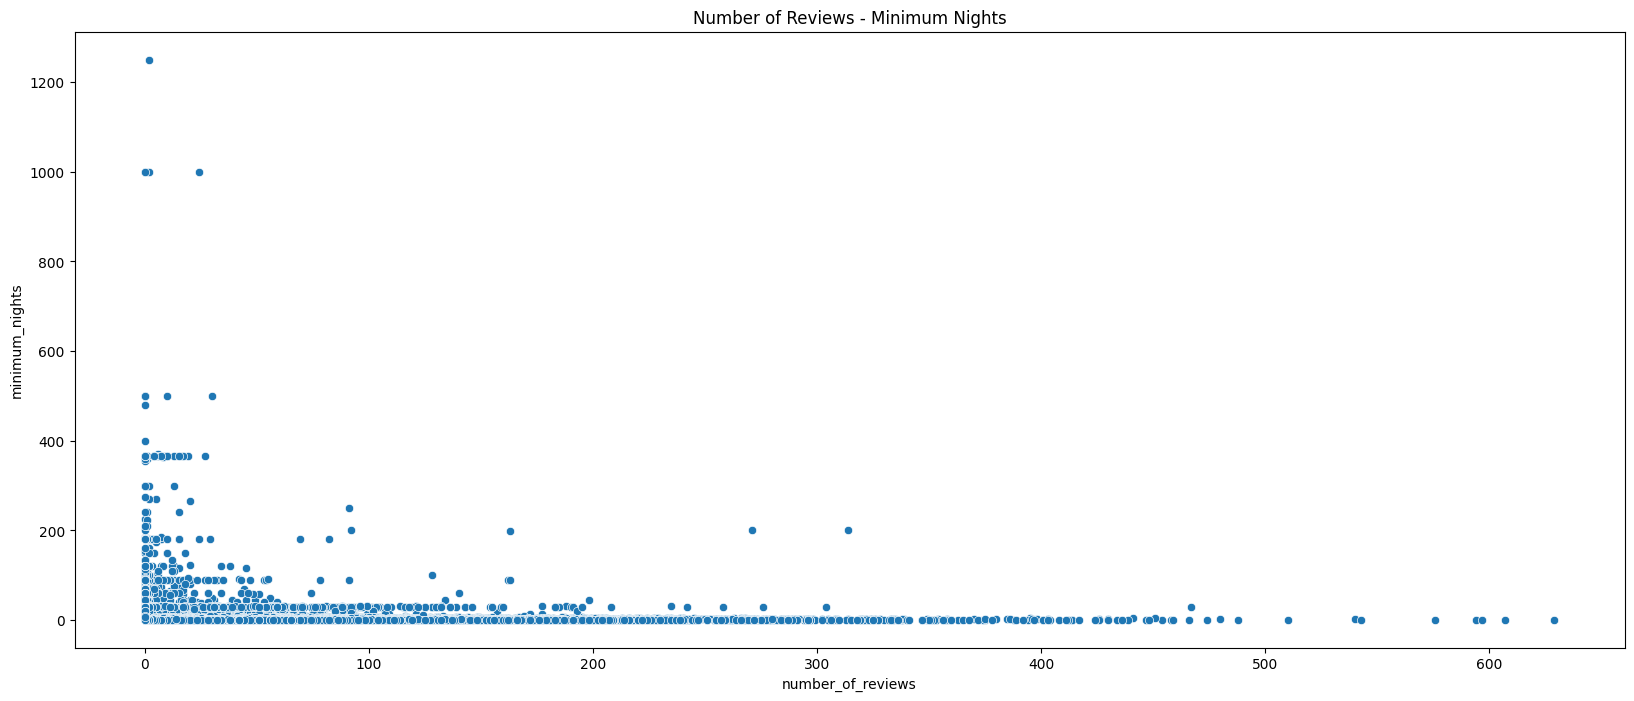

In [71]:
plt.figure(figsize=(20, 8))
sns.scatterplot(x="number_of_reviews", y="minimum_nights", data=data)
plt.title("Number of Reviews - Minimum Nights")

Text(0.5, 1.0, 'Number of Reviews - Minimum Nights')

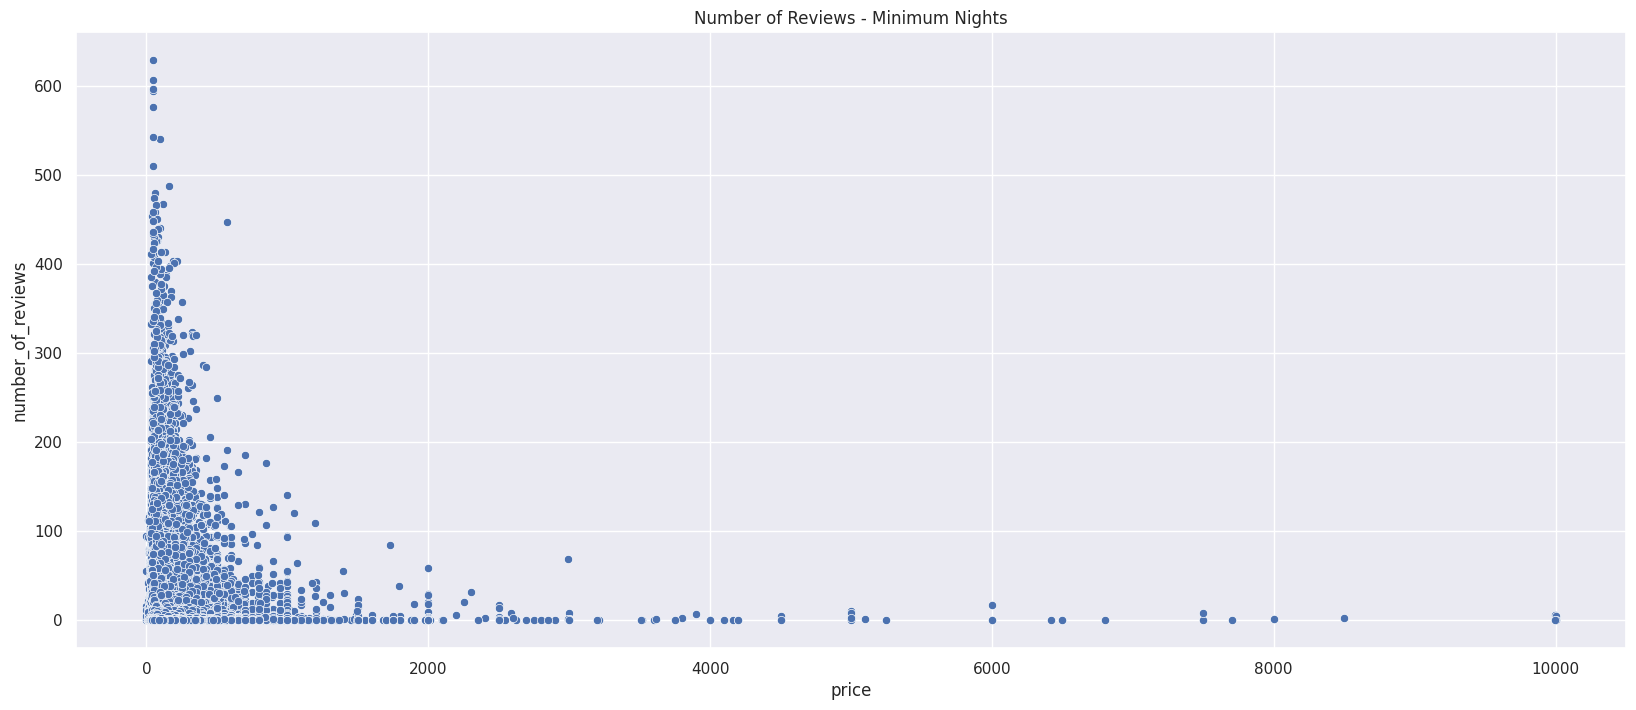

In [ ]:
plt.figure(figsize=(20, 8))
sns.scatterplot(y="number_of_reviews",x="price", data=data)
plt.title("Number of Reviews - Minimum Nights")